In [133]:
import torch
from torch import nn

In [135]:
from torch import nn

In [137]:
import matplotlib.pyplot as plt

In [139]:
torch.__version__

'2.7.0+cu118'

In [140]:
w=0.7
b=0.3

In [143]:
start= 0
end=1
step = 0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=w*x+b

In [144]:
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [147]:
len(x),len(y)

(50, 50)

In [149]:
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [153]:
len(x_test)

10

In [155]:
def plot(train_data=x_train,
        train_lables=y_train,
        test_data=x_test,
        test_lables=y_test,
         predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_lables,c='b',s=4,label="training data")
    plt.scatter(test_data,test_lables,c='g',s=4,label="testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions.detach().numpy(),c='r',s=4,label="predictions")
    plt.legend(prop={"size":14});

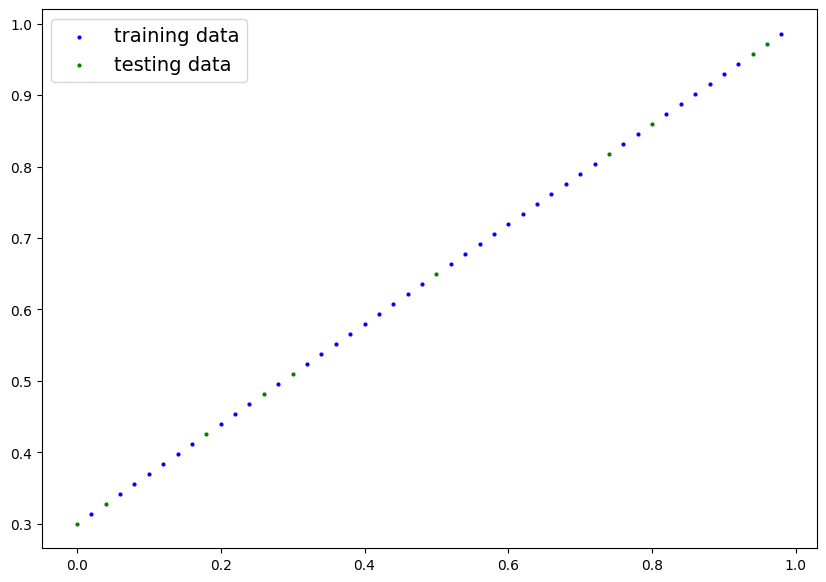

In [157]:
plot()

In [208]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.weights*x + self.bias

In [210]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
model_0,list(model_0.parameters())

(LinearRegressionModel(),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [212]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [214]:
with torch.inference_mode():
    y_preds=model_0(x_test)
y_preds

tensor([[0.1423],
        [0.3780],
        [0.1288],
        [0.1894],
        [0.3982],
        [0.2163],
        [0.2298],
        [0.4453],
        [0.4520],
        [0.2972]])

In [216]:
y_test

tensor([[0.3280],
        [0.8180],
        [0.3000],
        [0.4260],
        [0.8600],
        [0.4820],
        [0.5100],
        [0.9580],
        [0.9720],
        [0.6500]])

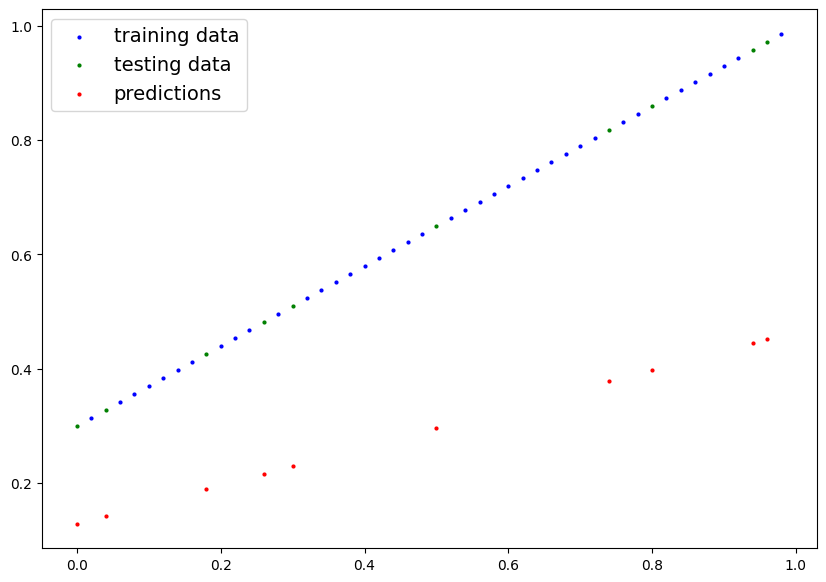

In [218]:
plot(predictions=y_preds)

In [220]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [222]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [224]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [226]:
epochs=200
epoch_cnt=[]
loss_val=[]
test_loss_val=[]
for epoch in range(epochs):
    
    model_0.train()
    y_preds=model_0(x_train)
    loss = loss_fn(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    print(loss)
    with torch.inference_mode():
        test_pred=model_0(x_test)
        test_loss=loss_fn(test_pred,y_test)
    if epoch % 10==0:
        epoch_cnt.append(epoch)
        loss_val.append(loss)
        test_loss_val.append(test_loss)
        print(f"epoch: {epoch}|loss:{loss}|test loss{test_loss}")
        print(model_0.state_dict())

tensor(0.3508, grad_fn=<MeanBackward0>)
epoch: 0|loss:0.3508472442626953|test loss0.33033865690231323
OrderedDict({'weights': tensor([0.3416]), 'bias': tensor([0.1388])})
tensor(0.3384, grad_fn=<MeanBackward0>)
tensor(0.3260, grad_fn=<MeanBackward0>)
tensor(0.3135, grad_fn=<MeanBackward0>)
tensor(0.3011, grad_fn=<MeanBackward0>)
tensor(0.2886, grad_fn=<MeanBackward0>)
tensor(0.2762, grad_fn=<MeanBackward0>)
tensor(0.2637, grad_fn=<MeanBackward0>)
tensor(0.2513, grad_fn=<MeanBackward0>)
tensor(0.2388, grad_fn=<MeanBackward0>)
tensor(0.2264, grad_fn=<MeanBackward0>)
epoch: 10|loss:0.22639408707618713|test loss0.20699819922447205
OrderedDict({'weights': tensor([0.3911]), 'bias': tensor([0.2388])})
tensor(0.2139, grad_fn=<MeanBackward0>)
tensor(0.2015, grad_fn=<MeanBackward0>)
tensor(0.1891, grad_fn=<MeanBackward0>)
tensor(0.1766, grad_fn=<MeanBackward0>)
tensor(0.1642, grad_fn=<MeanBackward0>)
tensor(0.1517, grad_fn=<MeanBackward0>)
tensor(0.1393, grad_fn=<MeanBackward0>)
tensor(0.1270, g

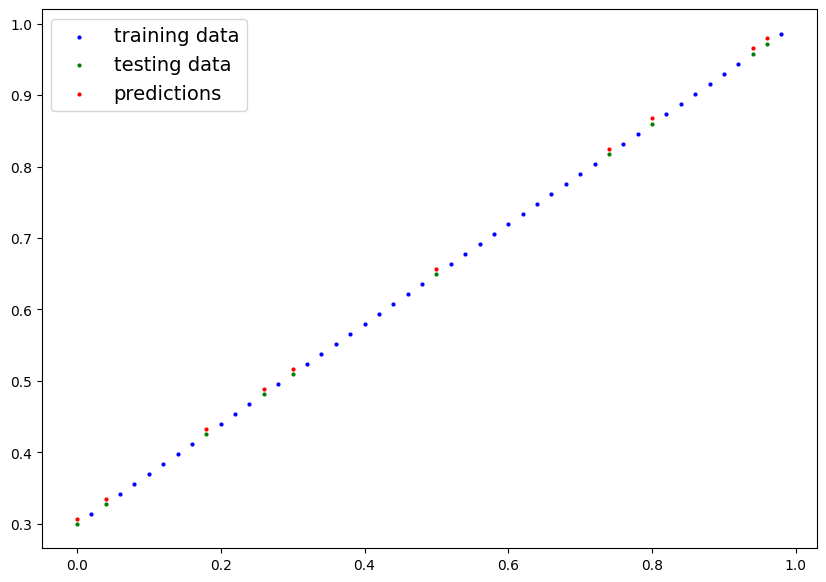

In [228]:
y_pred_new=model_0(x_test)
plot(predictions=y_pred_new)

<function matplotlib.pyplot.show(close=None, block=None)>

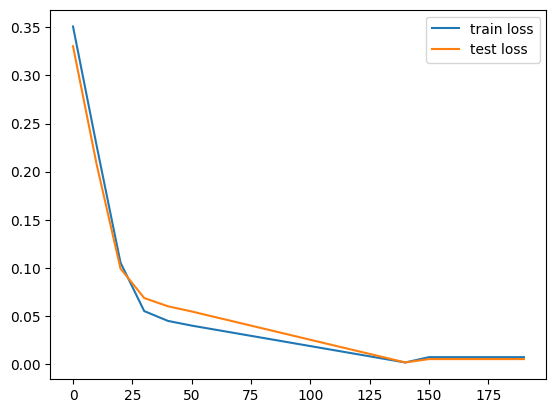

In [238]:
plt.plot(epoch_cnt,torch.tensor(loss_val).numpy(),label="train loss")
plt.plot(epoch_cnt,test_loss_val,label="test loss")
plt.legend()
plt.show

In [242]:
#saving the model
from pathlib import Path
m_path=Path("models")
m_path.mkdir(parents=True,exist_ok=True)

m_name="01_pytorch_workflow.pth"
m_save_path=m_path/m_name
m_save_path

WindowsPath('models/01_pytorch_workflow.pth')

In [244]:
torch.save(obj=model_0.state_dict(),f=m_save_path)

In [246]:
ls -l models

 Volume in drive C is Windows-SSD
 Volume Serial Number is 5A43-92D5

 Directory of C:\Users\Priyanshu\pytorch


 Directory of C:\Users\Priyanshu\pytorch\models

13-05-2025  20:25    <DIR>          .
13-05-2025  20:24    <DIR>          ..
13-05-2025  20:25    <DIR>          .ipynb_checkpoints
13-05-2025  20:25             1,989 01_pytorch_workflow.pth
               1 File(s)          1,989 bytes
               3 Dir(s)  146,143,686,656 bytes free


File Not Found


In [255]:
loaded_model_0.state_dict()
#without loading the state dict

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [257]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7007])), ('bias', tensor([0.3068]))])

In [259]:
#after loading state dict
#loading a model
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=m_save_path))

<All keys matched successfully>

In [263]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7007])), ('bias', tensor([0.3068]))])

using device : cuda


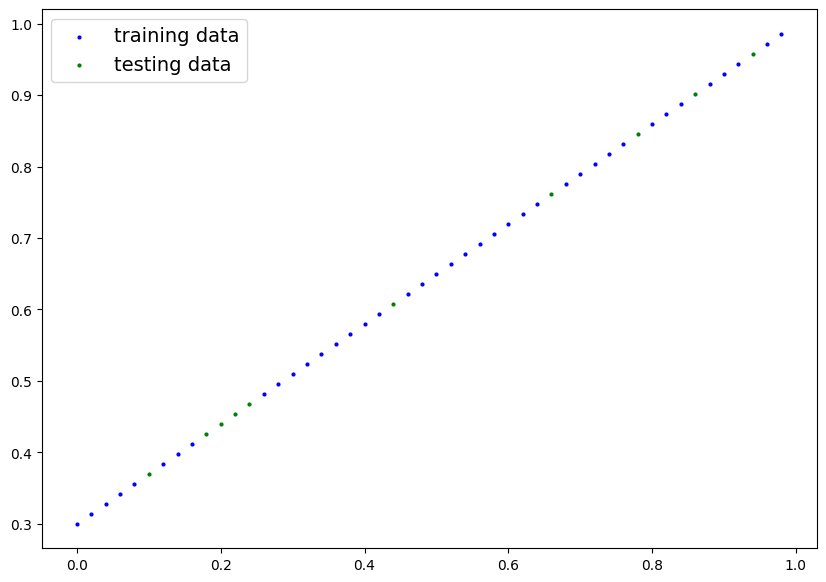






 OrderedDict({'linear_layer.weight': tensor([[0.7645]]), 'linear_layer.bias': tensor([0.8300])})



device of the parameters :  cpu
after changing the device :  cuda:0







BEFORE TRAINING THE MODEL


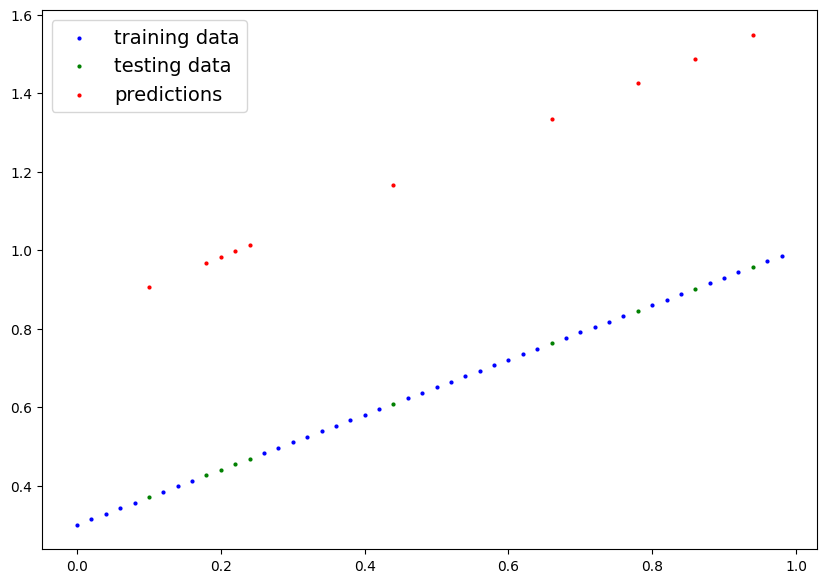







 OrderedDict({'linear_layer.weight': tensor([[0.7645]], device='cuda:0'), 'linear_layer.bias': tensor([0.8300], device='cuda:0')}) 


Epoch : 0|Loss : 0.5620835423469543|Test loss : 0.5475285649299622
Epoch : 10|Loss : 0.43738269805908203|Test loss : 0.42456722259521484
Epoch : 20|Loss : 0.31268182396888733|Test loss : 0.30160585045814514
Epoch : 30|Loss : 0.18798093497753143|Test loss : 0.17864446341991425
Epoch : 40|Loss : 0.06335847824811935|Test loss : 0.05839132145047188
Epoch : 50|Loss : 0.03489170968532562|Test loss : 0.04196906462311745
Epoch : 60|Loss : 0.030128611251711845|Test loss : 0.03623265027999878
Epoch : 70|Loss : 0.025596871972084045|Test loss : 0.030687956139445305
Epoch : 80|Loss : 0.021065134555101395|Test loss : 0.025143278762698174
Epoch : 90|Loss : 0.016533391550183296|Test loss : 0.01959858648478985
Epoch : 100|Loss : 0.011999026872217655|Test loss : 0.01410183310508728
Epoch : 110|Loss : 0.007467285729944706|Test loss : 0.008557143621146679
Epoch : 120|

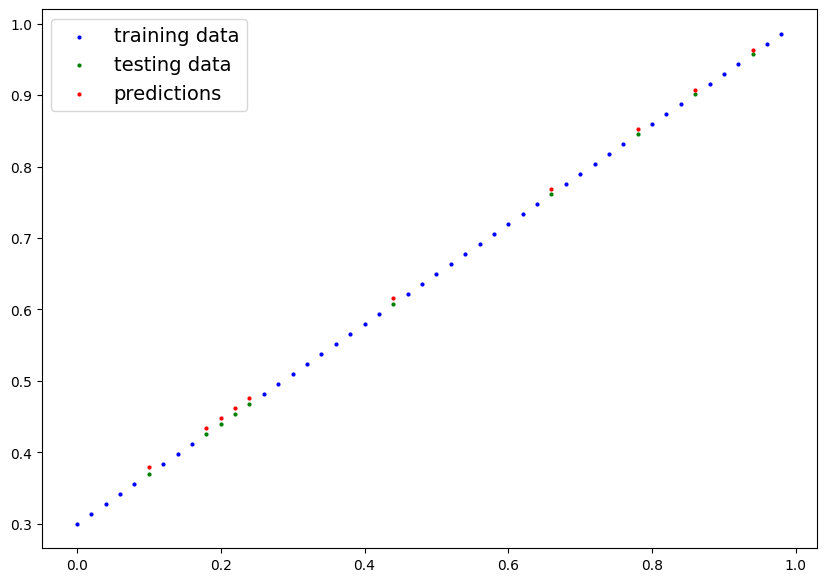

In [43]:
#putting all together
import torch
from torch import nn
import matplotlib.pyplot as plt

#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {device}")

#data
weight=0.7
bias=0.3

start=0
end=1
step=0.02

x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias

#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#plot data
def plot_p(train_data=x_train,
        train_lables=y_train,
        test_data=x_test,
        test_lables=y_test,
         predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_lables,c='b',s=4,label="training data")
    plt.scatter(test_data,test_lables,c='g',s=4,label="testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions.detach().cpu().numpy(),c='r',s=4,label="predictions")
    plt.legend(prop={"size":14});
    plt.show()
plot_p()

#building a model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,
                                   out_features=1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
print("\n\n\n\n\n",model_1.state_dict())

#training the model
print("\n\n\ndevice of the parameters : ",next(model_1.parameters()).device)

model_1.to(device)
print("after changing the device : ",next(model_1.parameters()).device)

loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                         lr=0.01)
#put data on the correct device
x_train=x_train.to(device)
x_test=x_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)
print("\n\n\n\n\n\n\nBEFORE TRAINING THE MODEL")
plot_p(predictions=model_1(x_test))
torch.manual_seed(42)
epochs=200
print("\n\n\n\n\n\n",model_1.state_dict(),"\n\n")
for epoch in range(epochs):
    y_pred=model_1(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    #testing
    model_1.eval()
    with torch.inference_mode():
        test_pred=model_1(x_test)
        test_loss=loss_fn(test_pred,y_test)


    if epoch%10==0:
        print(f"Epoch : {epoch}|Loss : {loss}|Test loss : {test_loss}")
print("\n\n\n",model_1.state_dict())
plot_p(predictions=test_pred)

#save and load


In [45]:
#save and load
from pathlib import Path
m_path=Path("models")
m_path.mkdir(parents=True,exist_ok=True)

m_name="01_pytorch_workflow_new_1.pth"
m_save_path=m_path/m_name
torch.save(obj=model_1.state_dict(),f=m_save_path)

In [47]:
ls -l models

 Volume in drive C is Windows-SSD
 Volume Serial Number is 5A43-92D5

 Directory of C:\Users\Priyanshu\pytorch


 Directory of C:\Users\Priyanshu\pytorch\models

14-05-2025  15:41    <DIR>          .
14-05-2025  15:52    <DIR>          ..
13-05-2025  20:25    <DIR>          .ipynb_checkpoints
13-05-2025  20:25             1,989 01_pytorch_workflow.pth
14-05-2025  15:52             2,229 01_pytorch_workflow_new_1.pth
               2 File(s)          4,218 bytes
               3 Dir(s)  146,570,805,248 bytes free


File Not Found


In [49]:
#loading
loaded_model_1=LinearRegressionModelV2()
print("before loading the state dict of model_1 : state of loaded_model_1 : \n",loaded_model_1.state_dict())
loaded_model_1.load_state_dict(torch.load(m_save_path))
print("After loading the state dict : \n",loaded_model_1.state_dict())

before loading the state dict of model_1 : state of loaded_model_1 : 
 OrderedDict({'linear_layer.weight': tensor([[0.7645]]), 'linear_layer.bias': tensor([0.8300])})
After loading the state dict : 
 OrderedDict({'linear_layer.weight': tensor([[0.6959]]), 'linear_layer.bias': tensor([0.3095])})


In [51]:
loaded_model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [53]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [55]:
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [57]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [59]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds=loaded_model_1(x_test)
test_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')